In [1]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from scipy import stats, interpolate
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.neighbors import KernelDensity

specific_feh = -0.9  # Example value for feh -1.5
specific_distance = 4000  # Example value for distance 210
path = 'galaxia.dat'
path_iso = 'Results.dat'

In [2]:
def read_columns(filepath):
    
    chunk = pd.read_csv(filepath, sep = '\s+', comment='#', header=None,
                         names = ['mini','mfin','age','feh','distance','l','b','px','py','pz','popid','exbv_schlegel'],
                         usecols = [0,1,2,3,4,5,6,7,8,9,10,11], chunksize = 200)
    data = pd.concat(chunk)
    
    return data

In [3]:
def read_iso_file(file_path):
	# Read the file into a pandas DataFrame
    chunk = pd.read_csv(file_path, sep='\s+', comment='#', header=None,
                        names=['Age', 'feh', 'distance', 'prob'],
                        usecols=[0, 1, 2, 3],chunksize=200)
    data_iso = pd.concat(chunk)
    return data_iso


In [4]:
data = read_columns(path)
data_iso = read_iso_file(path_iso)

In [5]:
Age=[]
count_age_10 = 0
count_age_11 = 0
count_age_14 = 0
for i in range(len(data['age'])):
    
    if data['age'][i] == 11.000:
        count_age_11+=1
    elif data['age'][i] == 14.000:
        count_age_14+=1
    elif data['age'][i] ==10.000 and (data['age'][i-1] == 14.000 or data['age'][i-1] == 10.000):
        count_age_10+=1
    else:
        Age.append(data['age'][i])

age_11 = stats.norm.rvs(loc=11, scale =0.5, size = count_age_11)
for i in range(len(age_11)):
    Age.append(age_11[i])

if count_age_10 != 0:
    
    age_14 = stats.norm.rvs(loc=14, scale =0.5, size = count_age_14*2)
    count=0
    for i in range(len(age_14)):
        age_14.sort()
        count+=1
        if count <= count_age_14:
            Age.append(age_14[i])
    
    age_10 = stats.norm.rvs(loc=10, scale =0.5, size = count_age_10)
    for i in range(len(age_10)):
        Age.append(age_10[i]) 
else:
    
    age_14 = stats.norm.rvs(loc=13, scale =0.5, size = count_age_14)
    for i in range(len(age_14)):
        Age.append(age_14[i])
        
print(count_age_11,count_age_14,count_age_10)
print(len(Age))
print(len(data['age']))    

86053 643 0
2717583
2717583


In [7]:
px = data['px']
py = data['py']
pz = data['pz']
l = data['l']
b = data['b']
distance = data['distance']

<h1>Density Distribution:</h1>


In [ ]:
py = data['py'].values
pz = data['pz'].values

points = np.vstack([py, pz]).T

kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(points)
density = np.exp(kde.score_samples(points))

fig = plt.figure(figsize=(14, 7))
ax = plt.axes()
sc = ax.scatter(py, pz, c=density, s=0.5, cmap='viridis')

plt.xlim(-30, 30)
plt.ylim(-15, 15)
plt.xlabel('py')
plt.ylabel('pz')
plt.title("Density Distribution")

cbar = plt.colorbar(sc,orientation='horizontal')
cbar.set_label('Density')

plt.show()

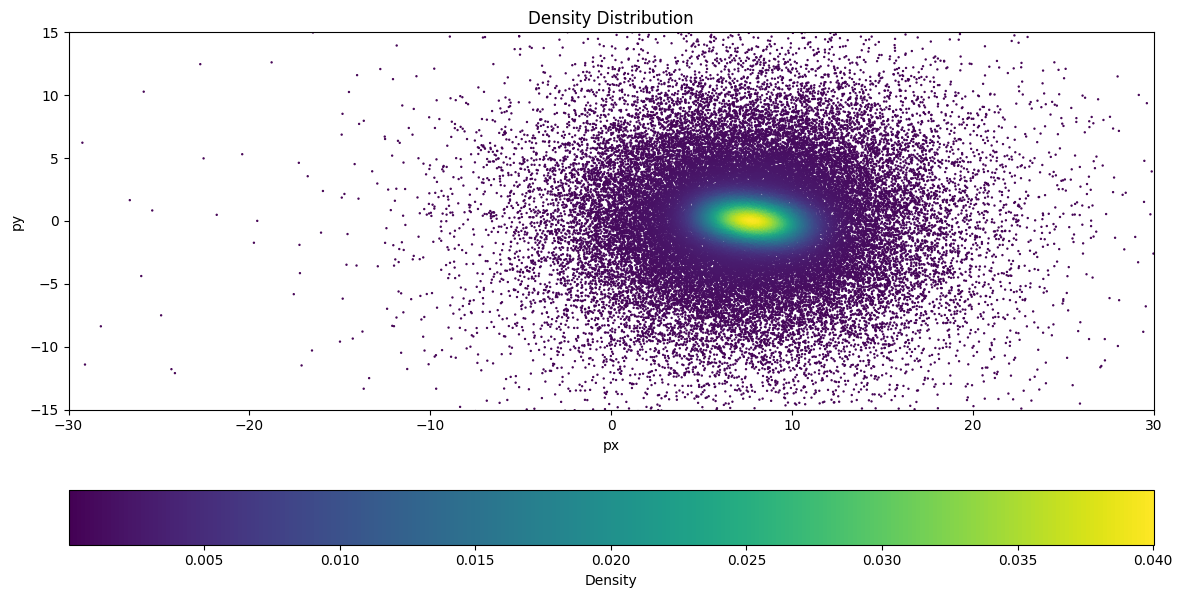

In [8]:
px = data['px'].values
py = data['py'].values

points = np.vstack([px, py]).T

kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(points)
density = np.exp(kde.score_samples(points))

fig = plt.figure(figsize=(14, 7))
ax=plt.axes()
sc = ax.scatter(px, py, c=density, s=0.5, cmap='viridis')

plt.xlim(-30, 30)
plt.ylim(-15, 15)
plt.xlabel('px')
plt.ylabel('py')
plt.title("Density Distribution")

cbar = plt.colorbar(sc,orientation='horizontal')
cbar.set_label('Density')

plt.show()

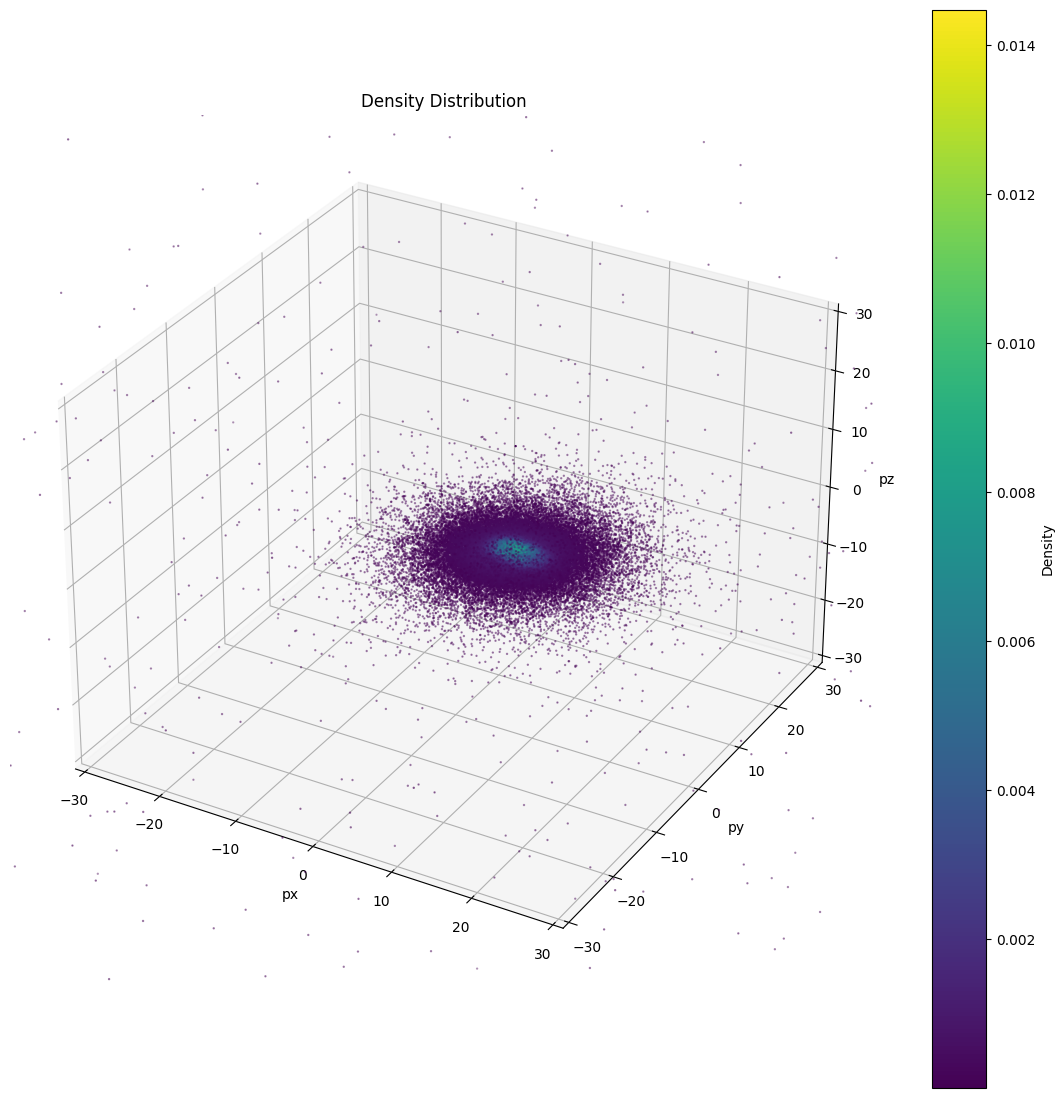

In [9]:
px = data['px'].values
py = data['py'].values
pz = data['pz'].values

# Stack the data points
points = np.vstack([px, py, pz]).T

# Perform Kernel Density Estimation
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(points)
density = np.exp(kde.score_samples(points))

# Create the figure and 3D axes
fig = plt.figure(figsize=(14, 14))
ax = plt.axes(projection='3d')

# Scatter plot with density-based color
sc = ax.scatter(px, py, pz, c=density, s=0.5, cmap='viridis')

# Set axes limits and labels
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(-30, 30)
ax.set_xlabel('px')
ax.set_ylabel('py')
ax.set_zlabel('pz')
plt.title("Density Distribution")
# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Density')

plt.show()


In [ ]:

# fig = plt.figure(figsize=(14,7))
# sc = plt.scatter(px,pz,s = 0.5,alpha=0.1)
# plt.xlim(-30,30)
# plt.ylim(-30,30)
# plt.xlabel('px')
# plt.ylabel('pz')


#Extinction_Map(Perpendicular to galactic plane)
#cm = plt.colormaps.get_cmap('RdYlBu')

# fig = plt.figure(figsize=(14,7))
# sc = plt.scatter(py,pz,s = 0.5,alpha = 0.1)
# #plt.colorbar(sc)
# plt.xlim(-30,30)
# plt.ylim(-15,15)
# plt.xlabel('py')
# plt.ylabel('pz')
# plt.title('Density distribution')
# plt.subplot(2,1,2)
# pd.DataFrame(px).plot(kind = "density",xlim=[-20,20],ylim=[-20,20])

# fig = plt.figure(figsize = (14,14))
# ax = plt.axes(projection='3d')
# sc = ax.scatter(px, py, pz,s=0.5,alpha=0.1) 
# ax.set_xlim(-30,30)
# ax.set_ylim(-30,30)
# ax.set_zlim(-30,30)
# ax.set_xlabel('px')
# ax.set_ylabel('py')
# ax.set_zlabel('pz')

# plt.show()

<h1>Age Distribution:</h1>


Text(0.5, 1.0, 'Age Distribution')

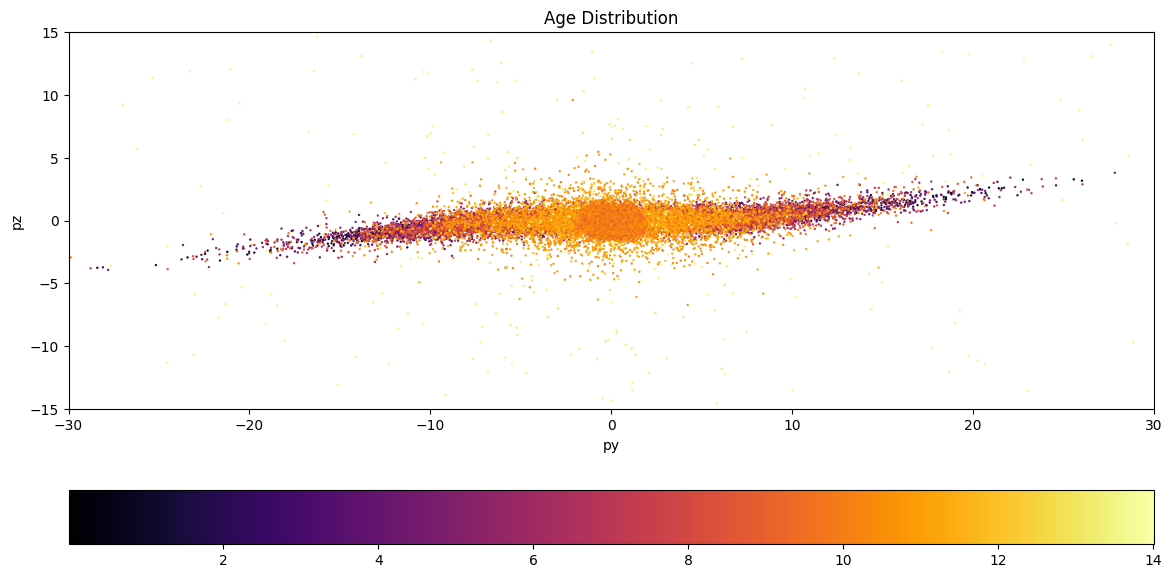

In [10]:
cm = plt.colormaps.get_cmap('inferno')
fig = plt.figure(figsize=(14,7))
sc = plt.scatter(py,pz,s = 0.5,c=Age,cmap=cm)
plt.colorbar(sc,orientation='horizontal')
plt.xlim(-30,30)
plt.ylim(-15,15)
plt.xlabel('py')
plt.ylabel('pz')
plt.title('Age Distribution')

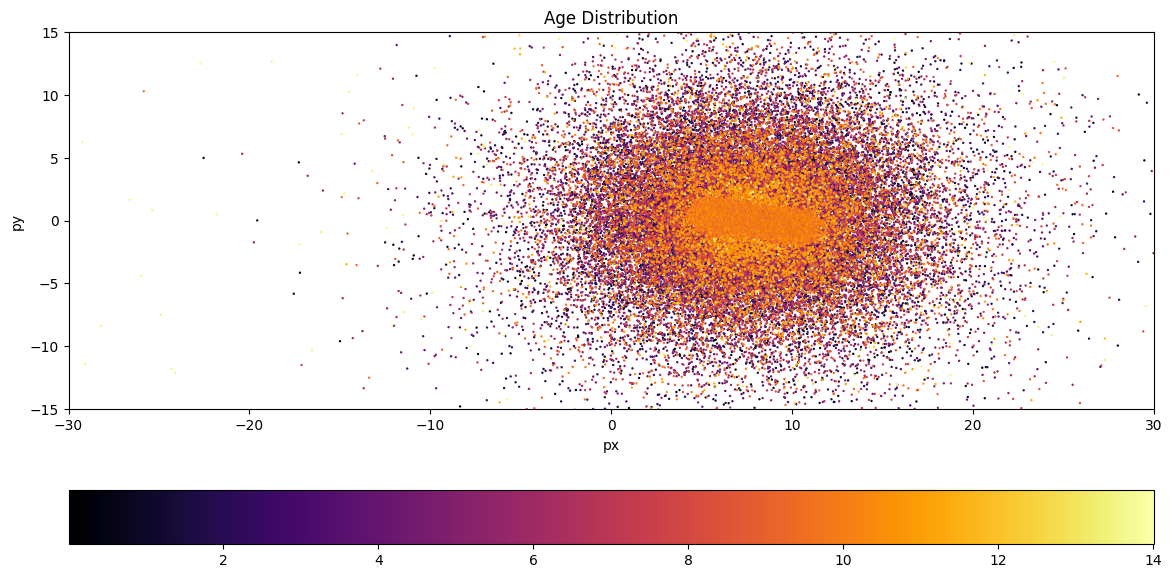

In [11]:
cm = plt.colormaps.get_cmap('inferno')
fig = plt.figure(figsize=(14,7))
sc = plt.scatter(px,py,s = 0.5,c=Age,cmap=cm)
plt.colorbar(sc,orientation='horizontal')
plt.xlim(-30,30)
plt.ylim(-15,15)
plt.xlabel('px')
plt.ylabel('py')
plt.title('Age Distribution')

plt.show()

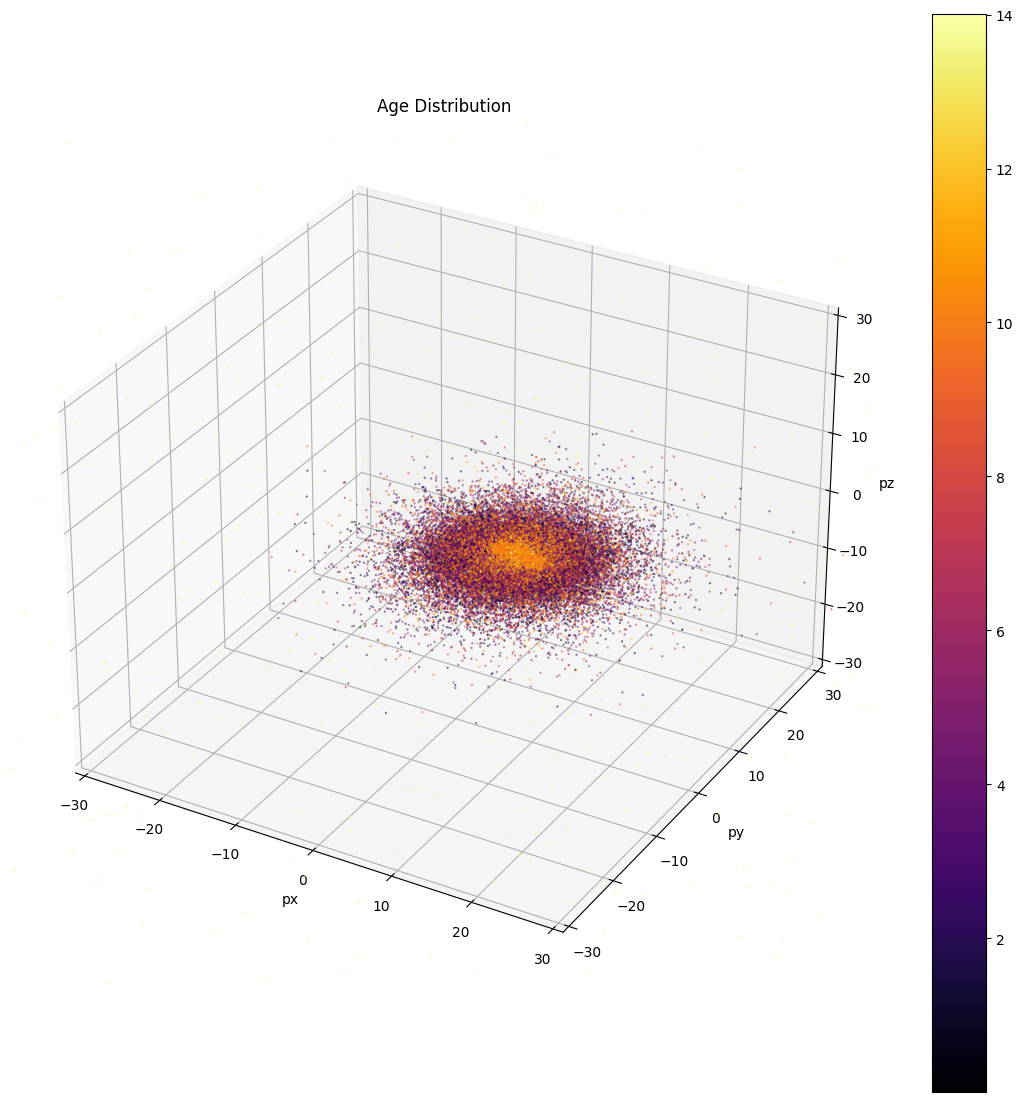

In [12]:
cm = plt.colormaps.get_cmap('inferno')
fig = plt.figure(figsize = (14,14))
ax = plt.axes(projection='3d')
sc = ax.scatter(px, py, pz,s=0.5,c=Age,cmap=cm) 
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(-30,30)
ax.set_xlabel('px')
ax.set_ylabel('py')
ax.set_zlabel('pz')
plt.colorbar(sc)
plt.title('Age Distribution')

plt.show()

<h1>Extinction_BV Distribution:</h1>


Text(0.5, 1.0, 'Extinction Distribution')

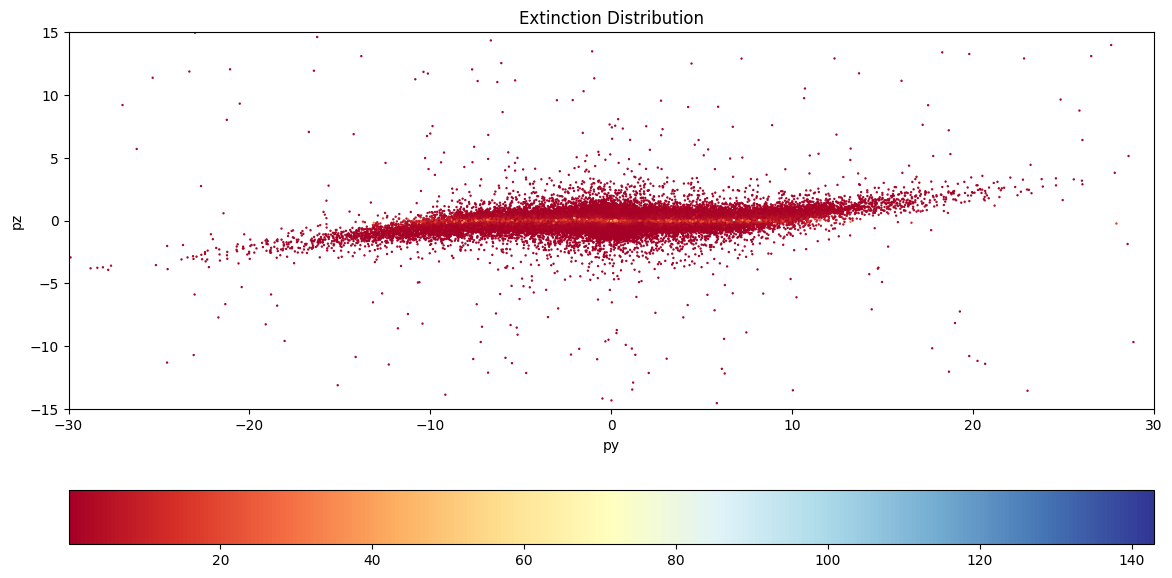

In [26]:
cm = plt.colormaps.get_cmap('RdYlBu')
fig = plt.figure(figsize=(14,7))
sc = plt.scatter(py,pz,s = 0.5,c=data['exbv_schlegel'],cmap=cm)
plt.colorbar(sc,orientation='horizontal')
plt.xlim(-30,30)
plt.ylim(-15,15)
plt.xlabel('py')
plt.ylabel('pz')
plt.title('Extinction Distribution')

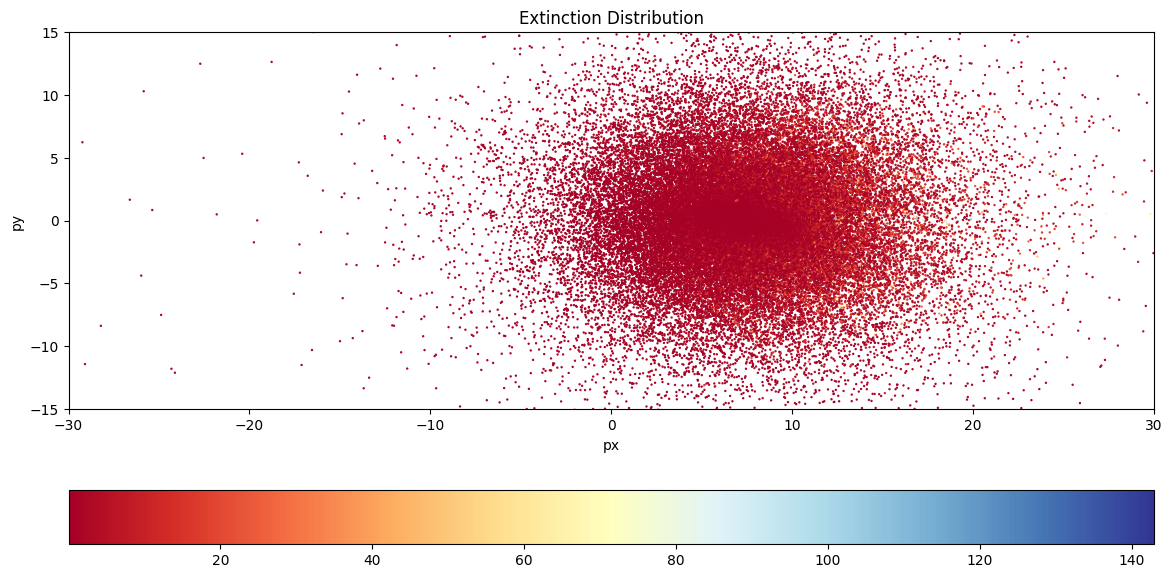

In [14]:
cm = plt.colormaps.get_cmap('RdYlBu')
fig = plt.figure(figsize=(14,7))
sc = plt.scatter(px,py,s = 0.5,c=data['exbv_schlegel'],cmap=cm)
plt.colorbar(sc,orientation='horizontal')
plt.xlim(-30,30)
plt.ylim(-15,15)
plt.xlabel('px')
plt.ylabel('py')
plt.title('Extinction Distribution')

plt.show()

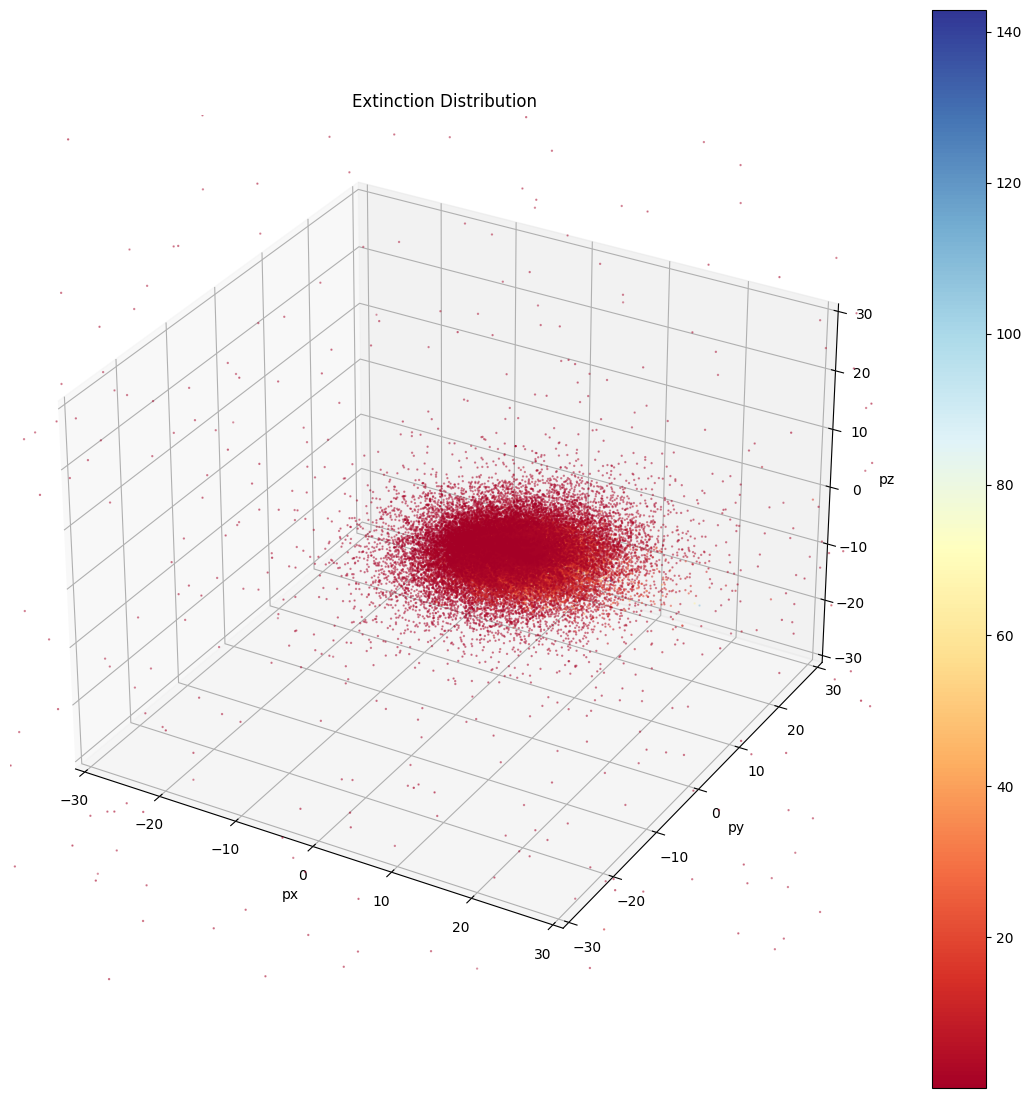

In [15]:
cm = plt.colormaps.get_cmap('RdYlBu')
fig = plt.figure(figsize = (14,14))
ax = plt.axes(projection='3d')
sc = ax.scatter(px, py, pz,s=0.5,c=data['exbv_schlegel'],cmap=cm) 
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(-30,30)
ax.set_xlabel('px')
ax.set_ylabel('py')
ax.set_zlabel('pz')
plt.colorbar(sc)
plt.title("Extinction Distribution")
plt.show()

<h1>Metallicity Distribution:</h1>


Text(0.5, 1.0, 'Metallicity Distribution')

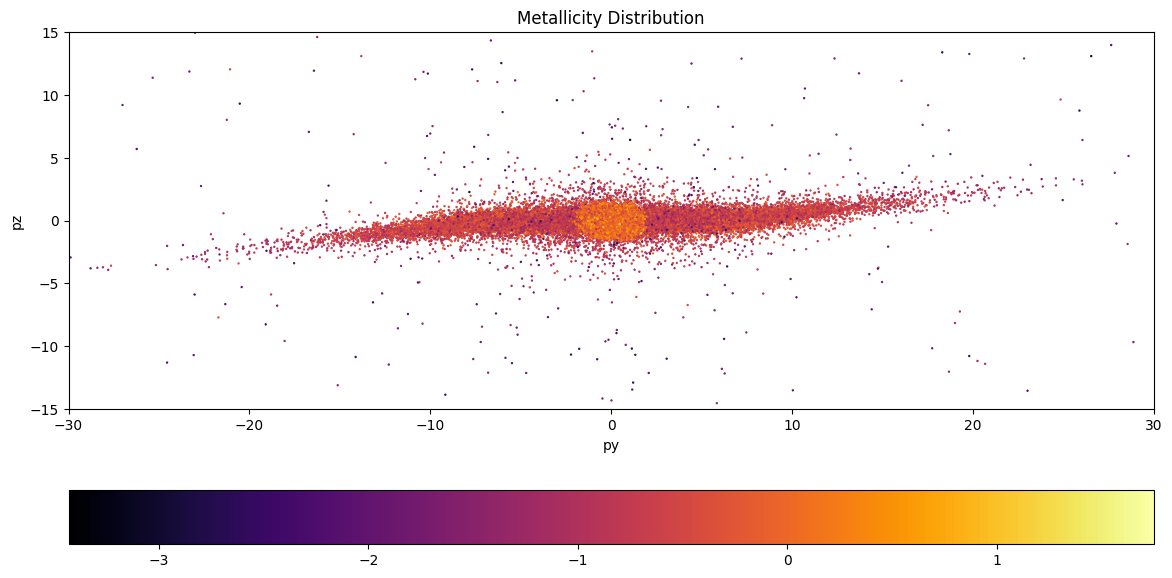

In [16]:
cm = plt.colormaps.get_cmap('inferno')
fig = plt.figure(figsize=(14,7))
sc = plt.scatter(py,pz,s = 0.5,c=data['feh'],cmap=cm)
plt.colorbar(sc,orientation='horizontal')
plt.xlim(-30,30)
plt.ylim(-15,15)
plt.xlabel('py')
plt.ylabel('pz')
plt.title('Metallicity Distribution')

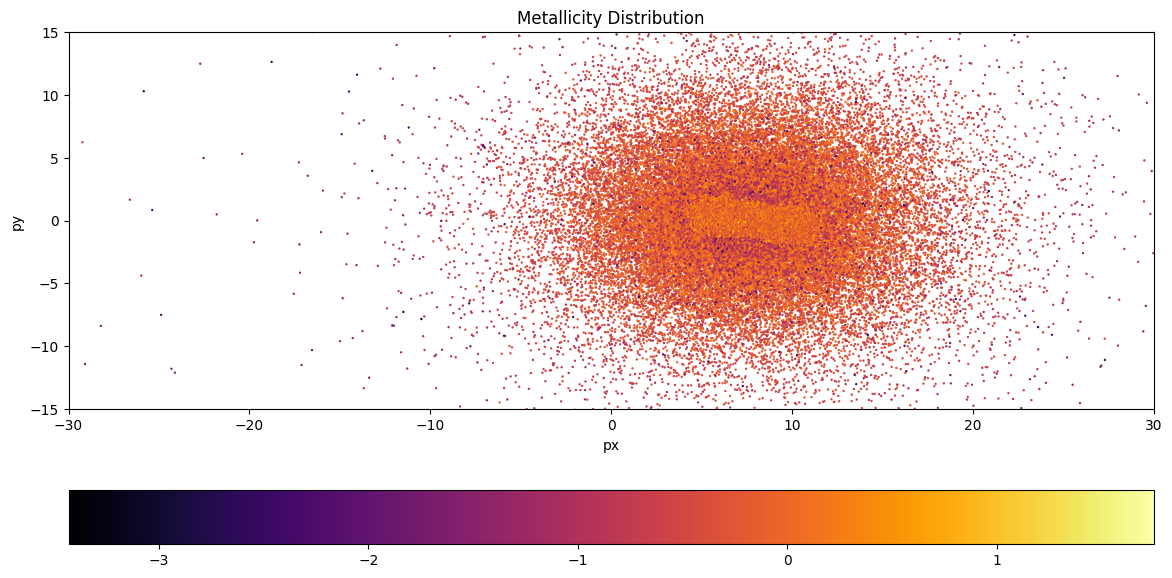

In [17]:
cm = plt.colormaps.get_cmap('inferno')
fig = plt.figure(figsize=(14,7))
sc = plt.scatter(px,py,s = 0.5,c=data['feh'],cmap=cm)
plt.colorbar(sc,orientation='horizontal')
plt.xlim(-30,30)
plt.ylim(-15,15)
plt.xlabel('px')
plt.ylabel('py')
plt.title('Metallicity Distribution')

plt.show()

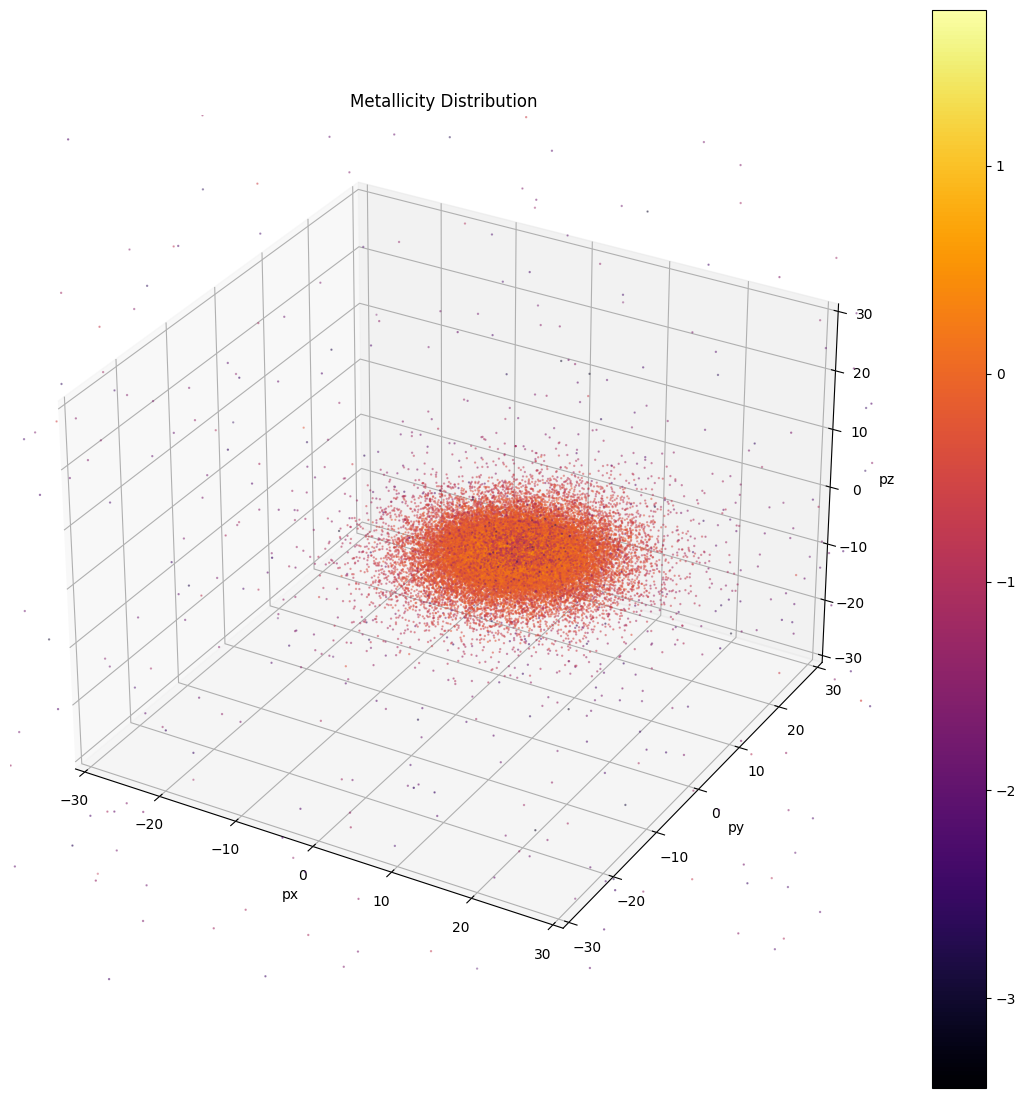

In [18]:
cm = plt.colormaps.get_cmap('inferno')
fig = plt.figure(figsize = (14,14))
ax = plt.axes(projection='3d')
sc = ax.scatter(px, py, pz,s=0.5,c=data['feh'],cmap=cm) 
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(-30,30)
ax.set_xlabel('px')
ax.set_ylabel('py')
ax.set_zlabel('pz')
plt.colorbar(sc)
plt.title("Metallicity Distribution")
plt.show()

<u><h1>G_lon vs G_lat:-</h1></u>



In [19]:
long=[]
lat=[]
for i in range(len(l)):
    if l[i]<180:
        long.append(l[i])
    else:
        long.append(l[i]-360)
lat = b

<h2>Density Distribution:</h2>


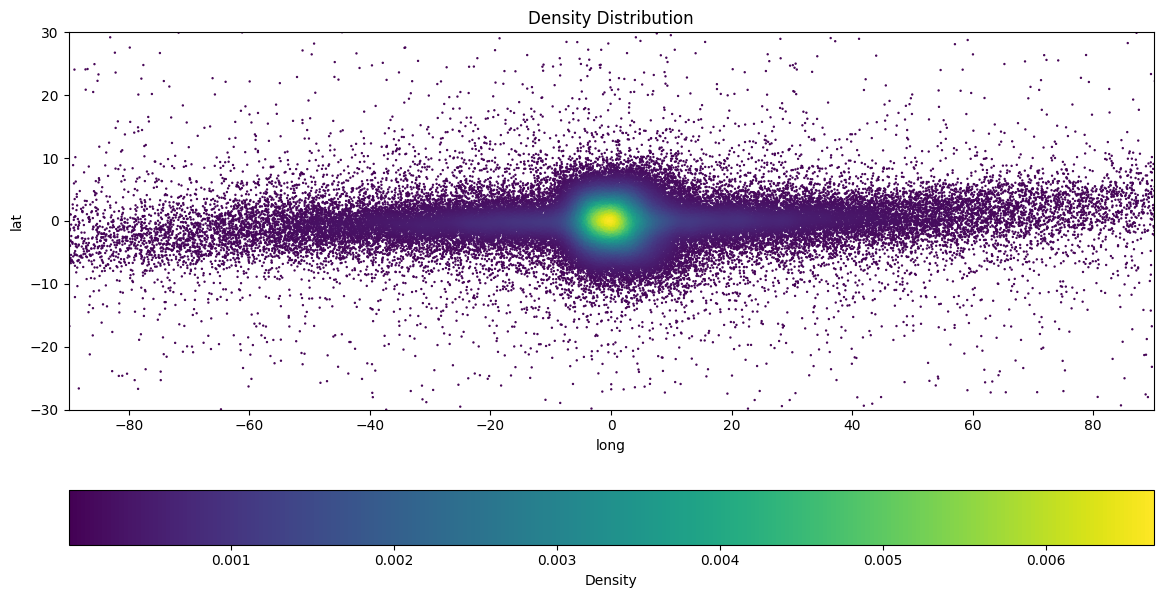

In [20]:
points = np.vstack([long, lat]).T

kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(points)
density = np.exp(kde.score_samples(points))

fig = plt.figure(figsize=(14, 7))
ax = plt.axes()
plt.size.use('dark_background')
sc = ax.scatter(long, lat, c=density, s=0.5, cmap='viridis')


plt.xlim(-90, 90)
plt.ylim(-30, 30)
plt.xlabel('long')
plt.ylabel('lat')
plt.title("Density Distribution")
cbar = plt.colorbar(sc,orientation='horizontal')
cbar.set_label('Density')

plt.show()

<h2>Age Distribution:</h2>


Text(0.5, 1.0, 'Age Distribution')

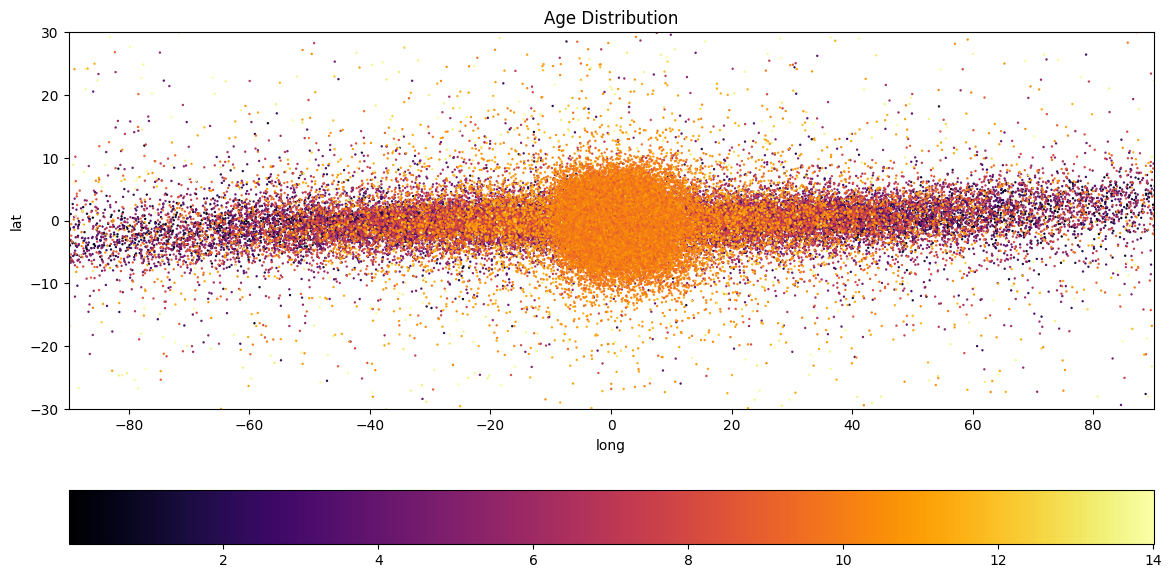

In [21]:
cm = plt.colormaps.get_cmap('inferno')
fig = plt.figure(figsize=(14,7))
sc = plt.scatter(long,lat,s = 0.5,c=Age,cmap=cm)
plt.colorbar(sc,orientation='horizontal')
plt.xlim(-90,90)
plt.ylim(-30,30)
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Age Distribution')

<h2>Extinction_BV Distribution:</h2>


Text(0.5, 1.0, 'Extinction Distribution')

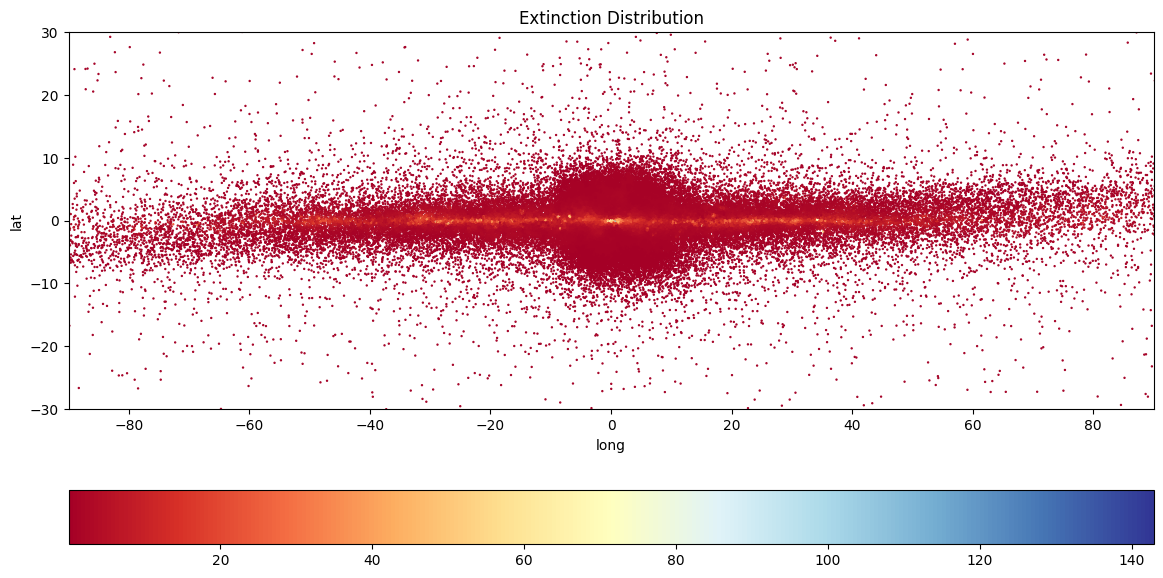

In [22]:
cm = plt.colormaps.get_cmap('RdYlBu')
fig = plt.figure(figsize=(14,7))
sc = plt.scatter(long,lat,s = 0.5,c=data["exbv_schlegel"],cmap=cm)
plt.colorbar(sc,orientation='horizontal')
plt.xlim(-90,90)
plt.ylim(-30,30)
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Extinction Distribution')

<h2>Metallicity Distribution:</h2>


Text(0.5, 1.0, 'Metallicity Distribution')

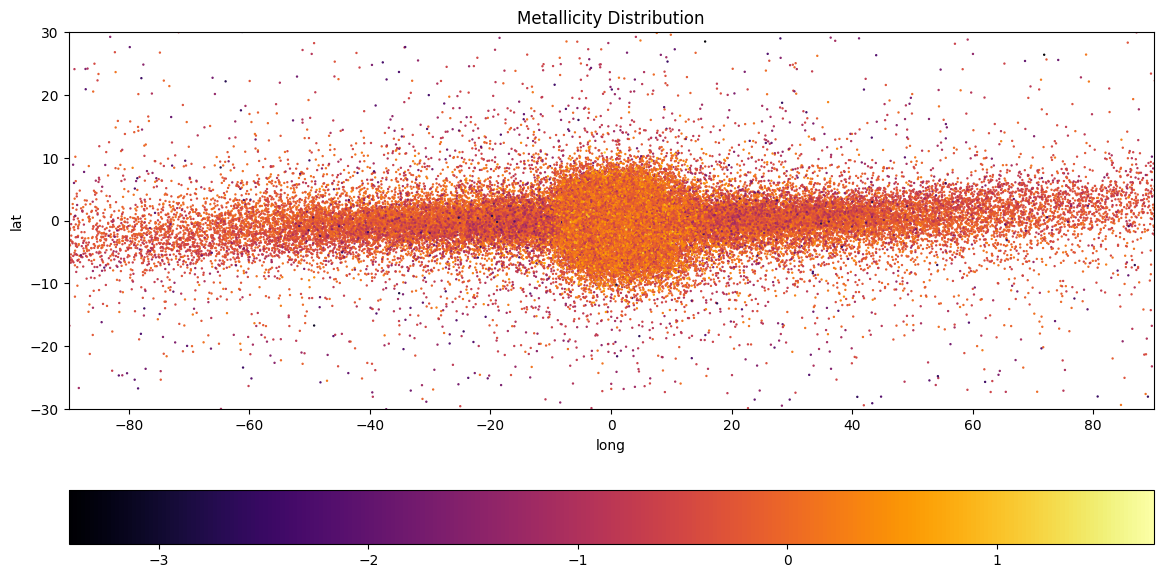

In [23]:
cm = plt.colormaps.get_cmap('inferno')
fig = plt.figure(figsize=(14,7))
sc = plt.scatter(long,lat,s = 0.5,c=data["feh"],cmap=cm)
plt.colorbar(sc,orientation='horizontal')
plt.xlim(-90,90)
plt.ylim(-30,30)
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Metallicity Distribution')

7.1601
